<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/FuzzyCtrlEx_TipsControlerPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d2eba7a19564f0bf383f66364ea67028ca3236303beb588fad5e37d55a190f3e
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
#add control about food,serivce form 1 to 10 stars || input use Atecedent command
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')

In [4]:
#output tip from 10 to 30 percents, output use Consequent command
tips = ctrl.Consequent(np.arange(10,31,1),'tips')

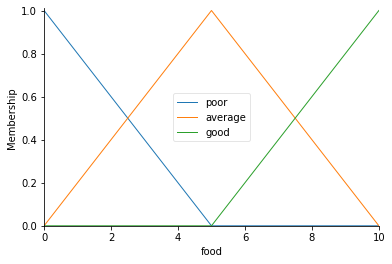

In [5]:
#create triangle graphs for food || the food.universe simply take the var inside the array set on np.arange
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

food.view()

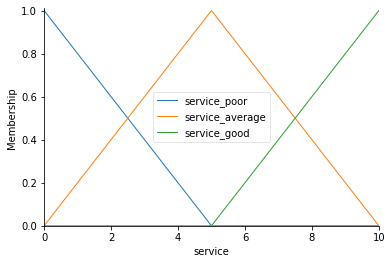

In [6]:
#create triangle graphs for service
service['service_poor']=fuzz.trimf(service.universe,[0,0,5])
service['service_average']=fuzz.trimf(service.universe,[0,5,10])
service['service_good']=fuzz.trimf(service.universe,[5,10,10])

service.view()


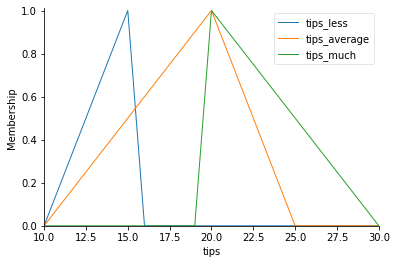

In [7]:
#create triangle graphs for tips
tips['tips_less']=fuzz.trimf(tips.universe,[10,15,15])
tips['tips_average']=fuzz.trimf(tips.universe,[10,20,25])
tips['tips_much']=fuzz.trimf(tips.universe,[20,20,30])

tips.view()


In [8]:
#set rules for controler
rule1 = ctrl.Rule(food['poor'] & service['service_poor'],tips['tips_less'])
rule2 = ctrl.Rule(food['poor'] & service['service_average'],tips['tips_less'])
rule3 = ctrl.Rule(food['poor'] & service['service_good'],tips['tips_average'])
rule4 = ctrl.Rule(food['average'] & service['service_poor'],tips['tips_less'])
rule5 = ctrl.Rule(food['average'] & service['service_average'],tips['tips_average'])
rule6 = ctrl.Rule(food['average'] & service['service_good'],tips['tips_much'])
rule7 = ctrl.Rule(food['good'] & service['service_poor'],tips['tips_average'])
rule8 = ctrl.Rule(food['good'] & service['service_average'],tips['tips_average'])
rule9 = ctrl.Rule(food['good'] & service['service_good'],tips['tips_much'])

In [9]:
#begin training, how many rules much tell
tipping_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_control)

In [10]:
#input for testing
tipping.input['food'] = 2
tipping.input['service'] = 3


17.126484018264836


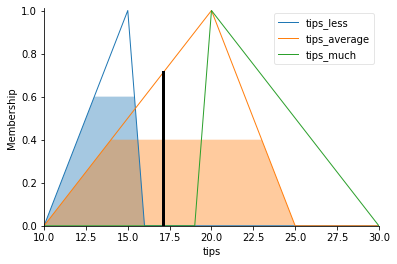

In [11]:
tipping.compute()
print(tipping.output['tips'])
tips.view(sim=tipping)